# Exploring the change of delta_x (spatial resolution) in diffusion accuracy.
#### From the same initial setup, diffusion is carried out over a fixed time span,
#### at different spatial resolutions - and then the respective results are compared

LAST REVISED: June 23, 2024 (using v. 1.0 beta34.1)

In [1]:
import set_path      # Importing this module will add the project's home directory to sys.path

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from life123 import BioSim1D
from life123 import ChemData as chem
from life123 import Numerical as num

import plotly.express as px
from life123 import HtmlLog as log
from life123 import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_heatmap_11", "vue_curves_3"])

-> Output will be LOGGED into the file 'spatial_resolution_1.log.htm'


In [4]:
# Set the heatmap parameters (for the log file)
heatmap_pars = {"range": [0, 150],
                "outer_width": 850, "outer_height": 150,
                "margins": {"top": 30, "right": 30, "bottom": 30, "left": 55}
                }

# Set the parameters of the line plots
lineplot_pars = {"range": [0, 150],
                "outer_width": 850, "outer_height": 250,
                "margins": {"top": 30, "right": 30, "bottom": 30, "left": 55}
                }

## Prepare the initial system

In [5]:
chem_data = chem(names=["A"], diffusion_rates=[0.1])

conc_list=[10,13,17,21,25,28,30,38,42,55,65,47,35,32,27,23,20,17,14,8,3,10,16,18,
           20,25,30,35,40,65,85,115,150,92,73,69,65,50,42,36,20,45,50,55,69,82,95,
           77,60,43,37,31,25,22,20,18,15,11,9, 8]

bio = BioSim1D(n_bins=len(conc_list), chem_data=chem_data)

bio.set_species_conc(species_name="A", conc_list=conc_list)

bio.describe_state()

SYSTEM STATE at Time t = 0:
60 bins and 1 species:
  Species 0 (A). Diff rate: 0.1. Conc: [ 10.  13.  17.  21.  25.  28.  30.  38.  42.  55.  65.  47.  35.  32.
  27.  23.  20.  17.  14.   8.   3.  10.  16.  18.  20.  25.  30.  35.
  40.  65.  85. 115. 150.  92.  73.  69.  65.  50.  42.  36.  20.  45.
  50.  55.  69.  82.  95.  77.  60.  43.  37.  31.  25.  22.  20.  18.
  15.  11.   9.   8.]


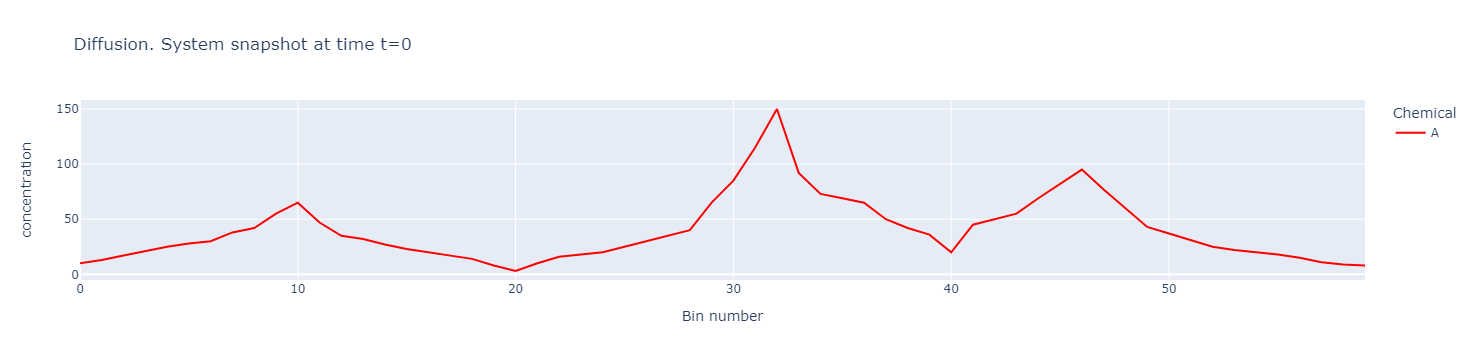

In [6]:
# Line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"Diffusion. System snapshot at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

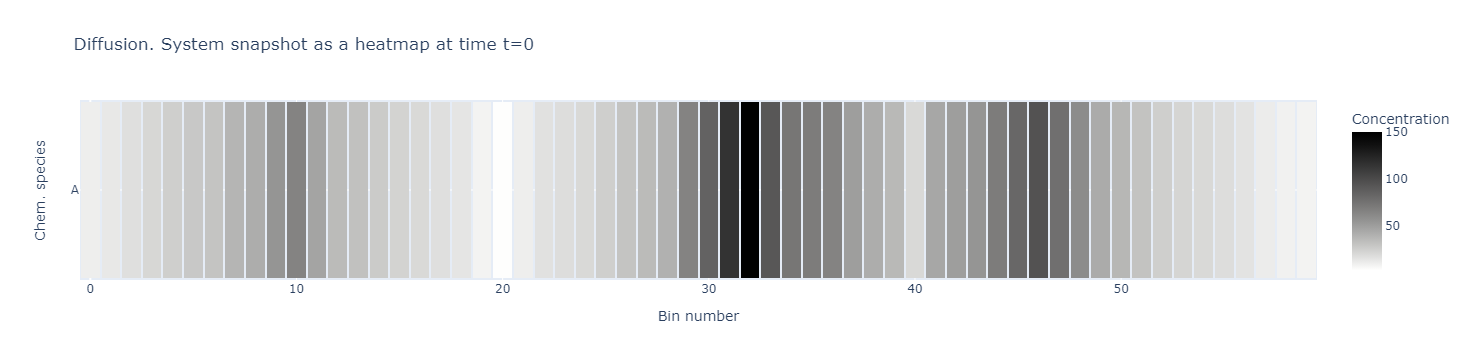

In [7]:
# Show as a heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= f"Diffusion. System snapshot as a heatmap at time t={bio.system_time}", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                text_auto=False, color_continuous_scale="gray_r")
fig.data[0].xgap=2
fig.data[0].ygap=4

fig.show()

In [8]:
log.write("1-D diffusion of a single species, with Diffusion rate 0.1",
          style=log.h2)
log.write("Initial system state at time t=0:", blanks_before=2, style=log.bold)

# Output a heatmap to the log file
bio.single_species_heatmap(species_index=0, heatmap_pars=heatmap_pars, graphic_component="vue_heatmap_11")

# Output a line plot the log file
bio.single_species_line_plot(species_index=0, plot_pars=lineplot_pars, graphic_component="vue_curves_3")

1-D diffusion of a single species, with Diffusion rate 0.1


Initial system state at time t=0:
[GRAPHIC ELEMENT SENT TO LOG FILE `spatial_resolution_1.log.htm`]
[GRAPHIC ELEMENT SENT TO LOG FILE `spatial_resolution_1.log.htm`]


In [9]:
bio.describe_state(concise=True)

SYSTEM STATE at Time t = 0:
[[ 10.  13.  17.  21.  25.  28.  30.  38.  42.  55.  65.  47.  35.  32.
   27.  23.  20.  17.  14.   8.   3.  10.  16.  18.  20.  25.  30.  35.
   40.  65.  85. 115. 150.  92.  73.  69.  65.  50.  42.  36.  20.  45.
   50.  55.  69.  82.  95.  77.  60.  43.  37.  31.  25.  22.  20.  18.
   15.  11.   9.   8.]]


### Populate the data set with more bins, using interpolated concentration values
### IMPORTANT: we're **NOT** changing spacial resolution here; we're just creating a less ragged dataset, as *our initial system state*

In [10]:
bio.smooth_spatial_resolution()
bio.describe_state()

SYSTEM STATE at Time t = 0:
119 bins and 1 species:
  Species 0 (A). Diff rate: 0.1. Conc: [ 10.   11.5  13.   15.   17.   19.   21.   23.   25.   26.5  28.   29.
  30.   34.   38.   40.   42.   48.5  55.   60.   65.   56.   47.   41.
  35.   33.5  32.   29.5  27.   25.   23.   21.5  20.   18.5  17.   15.5
  14.   11.    8.    5.5   3.    6.5  10.   13.   16.   17.   18.   19.
  20.   22.5  25.   27.5  30.   32.5  35.   37.5  40.   52.5  65.   75.
  85.  100.  115.  132.5 150.  121.   92.   82.5  73.   71.   69.   67.
  65.   57.5  50.   46.   42.   39.   36.   28.   20.   32.5  45.   47.5
  50.   52.5  55.   62.   69.   75.5  82.   88.5  95.   86.   77.   68.5
  60.   51.5  43.   40.   37.   34.   31.   28.   25.   23.5  22.   21.
  20.   19.   18.   16.5  15.   13.   11.   10.    9.    8.5   8. ]


In [11]:
bio.n_bins

119

# The STARTING POINT
### This system setup will be our starting point in exploring diffusion using different spacial resolutions

In [12]:
original_state = bio.save_system()    # SAVE a copy of the system state, to do multiple runs starting from it

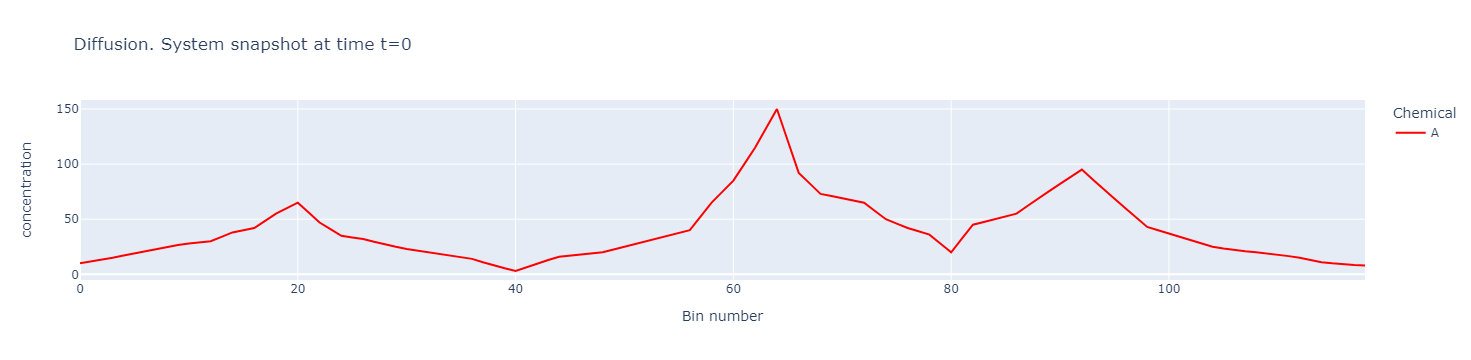

In [13]:
# Line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"Diffusion. System snapshot at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

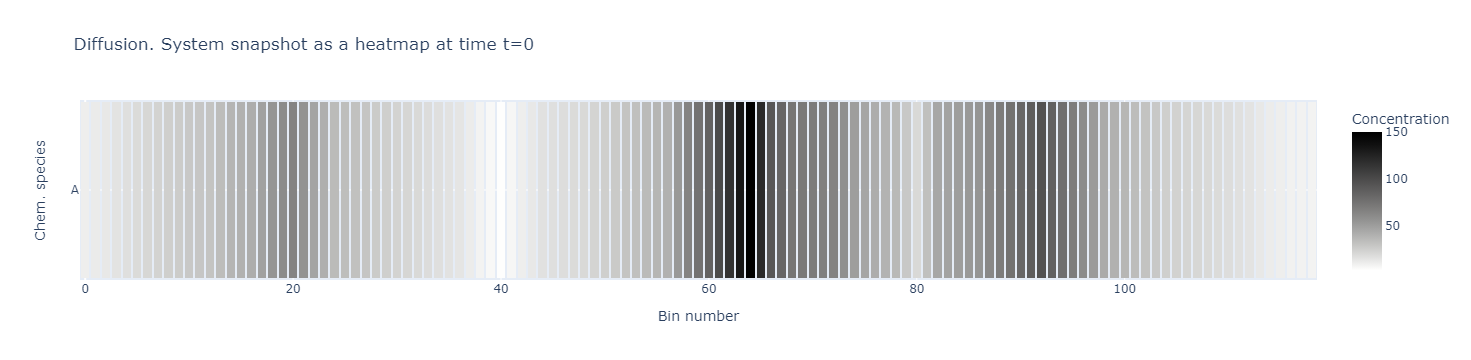

In [14]:
# Show as a heatmap
fig = px.imshow(bio.system_snapshot().T, 
                title= f"Diffusion. System snapshot as a heatmap at time t={bio.system_time}", 
                labels=dict(x="Bin number", y="Chem. species", color="Concentration"),
                text_auto=False, color_continuous_scale="gray_r")
fig.data[0].xgap=2
fig.data[0].ygap=4

fig.show()

# Initial Diffusions with delta_x = 1

In [15]:
bio.describe_state(concise=True)   # Our initial state

SYSTEM STATE at Time t = 0:
[[ 10.   11.5  13.   15.   17.   19.   21.   23.   25.   26.5  28.   29.
   30.   34.   38.   40.   42.   48.5  55.   60.   65.   56.   47.   41.
   35.   33.5  32.   29.5  27.   25.   23.   21.5  20.   18.5  17.   15.5
   14.   11.    8.    5.5   3.    6.5  10.   13.   16.   17.   18.   19.
   20.   22.5  25.   27.5  30.   32.5  35.   37.5  40.   52.5  65.   75.
   85.  100.  115.  132.5 150.  121.   92.   82.5  73.   71.   69.   67.
   65.   57.5  50.   46.   42.   39.   36.   28.   20.   32.5  45.   47.5
   50.   52.5  55.   62.   69.   75.5  82.   88.5  95.   86.   77.   68.5
   60.   51.5  43.   40.   37.   34.   31.   28.   25.   23.5  22.   21.
   20.   19.   18.   16.5  15.   13.   11.   10.    9.    8.5   8. ]]


In [16]:
bio.diffuse(total_duration=7, time_step=0.0005)
bio.describe_state(concise=True)

SYSTEM STATE at Time t = 7:
[[ 10.81374413  11.75949885  13.25000185  15.062428    17.01188631
   19.00006197  20.98868984  22.94206218  24.77953224  26.39811453
   27.84518887  29.27277252  31.20853868  34.12698244  37.32677234
   40.2862322   43.81041987  48.78035189  54.15351454  58.2814886
   59.14279616  54.77210271  48.04680994  41.79043277  36.93388531
   33.9061457   31.69382485  29.46191837  27.20137234  25.10925294
   23.22142636  21.55799283  20.01085627  18.49643905  16.96650717
   15.33320734  13.3825283   10.9090395    8.31230858   6.22475706
    5.52496549   7.11396222   9.88035549  12.74022689  15.15002384
   16.77867411  17.98845929  19.16168898  20.63070462  22.66884325
   25.03404219  27.50595199  30.00545331  32.53611034  35.22552071
   38.6175266   44.15676727  53.36291807  64.2882023   75.32432162
   87.08827561 100.66910178 115.12022797 127.63314241 130.92324021
  117.99541158  99.32869508  85.37270647  76.57561881  71.8930744
   69.0560342   66.42137568  62.7673

In [17]:
# SAVE the above system data (a matrix of dimension n_species x n_bins):  this is the result of diffusion with delta_x = 1
diffuse_dx_1 = bio.system

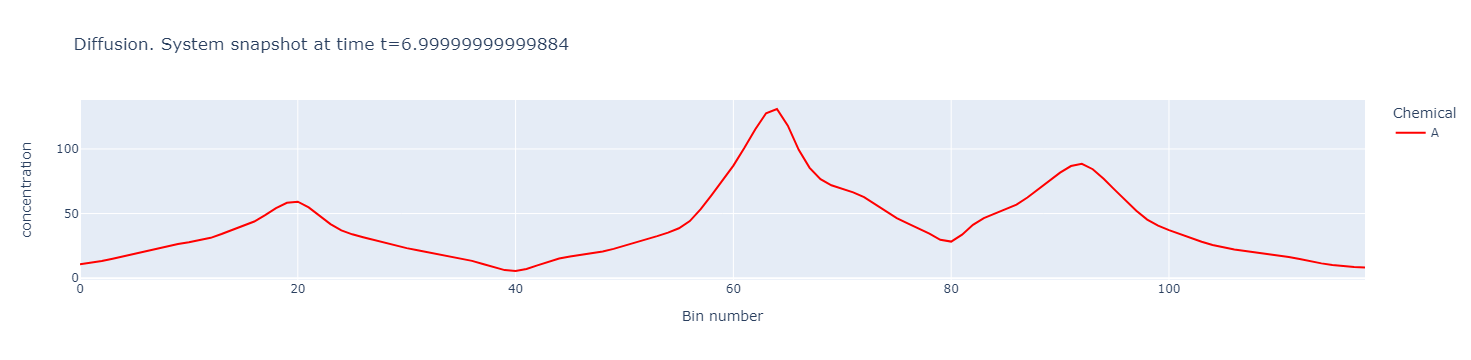

In [18]:
# Line plot
fig = px.line(data_frame=bio.system_snapshot(), y=["A"], 
              title= f"Diffusion. System snapshot at time t={bio.system_time}",
              color_discrete_sequence = ['red'],
              labels={"value":"concentration", "variable":"Chemical", "index":"Bin number"})
fig.show()

### Enough time has proceeded to result in some smoothing, and non-puny changes in most values - but still nowhere near equilibrium

# Now restore the system to its initial (pre-diffusion) state
### and then perform a diffusion over the same time span, but with DOUBLE the spacial resolution
#### delta_x will be be 1/2 instead of the original default 1

In [19]:
bio.restore_system(original_state)

In [20]:
bio.describe_state()

SYSTEM STATE at Time t = 0:
119 bins and 1 species:
  Species 0 (A). Diff rate: 0.1. Conc: [ 10.   11.5  13.   15.   17.   19.   21.   23.   25.   26.5  28.   29.
  30.   34.   38.   40.   42.   48.5  55.   60.   65.   56.   47.   41.
  35.   33.5  32.   29.5  27.   25.   23.   21.5  20.   18.5  17.   15.5
  14.   11.    8.    5.5   3.    6.5  10.   13.   16.   17.   18.   19.
  20.   22.5  25.   27.5  30.   32.5  35.   37.5  40.   52.5  65.   75.
  85.  100.  115.  132.5 150.  121.   92.   82.5  73.   71.   69.   67.
  65.   57.5  50.   46.   42.   39.   36.   28.   20.   32.5  45.   47.5
  50.   52.5  55.   62.   69.   75.5  82.   88.5  95.   86.   77.   68.5
  60.   51.5  43.   40.   37.   34.   31.   28.   25.   23.5  22.   21.
  20.   19.   18.   16.5  15.   13.   11.   10.    9.    8.5   8. ]


In [21]:
# Double the spacial resolution
bio.increase_spatial_resolution(2)
bio.describe_state()

SYSTEM STATE at Time t = 0:
238 bins and 1 species:
  Species 0 (A). Diff rate: 0.1. Conc: [ 10.   10.   11.5  11.5  13.   13.   15.   15.   17.   17.   19.   19.
  21.   21.   23.   23.   25.   25.   26.5  26.5  28.   28.   29.   29.
  30.   30.   34.   34.   38.   38.   40.   40.   42.   42.   48.5  48.5
  55.   55.   60.   60.   65.   65.   56.   56.   47.   47.   41.   41.
  35.   35.   33.5  33.5  32.   32.   29.5  29.5  27.   27.   25.   25.
  23.   23.   21.5  21.5  20.   20.   18.5  18.5  17.   17.   15.5  15.5
  14.   14.   11.   11.    8.    8.    5.5   5.5   3.    3.    6.5   6.5
  10.   10.   13.   13.   16.   16.   17.   17.   18.   18.   19.   19.
  20.   20.   22.5  22.5  25.   25.   27.5  27.5  30.   30.   32.5  32.5
  35.   35.   37.5  37.5  40.   40.   52.5  52.5  65.   65.   75.   75.
  85.   85.  100.  100.  115.  115.  132.5 132.5 150.  150.  121.  121.
  92.   92.   82.5  82.5  73.   73.   71.   71.   69.   69.   67.   67.
  65.   65.   57.5  57.5  50.   50.   46.

In [22]:
# Now repeat the idential diffusion process as before, but with half the delta_x
bio.diffuse(total_duration=7, time_step=0.0005, delta_x=0.5)

{'steps': 14000}

In [23]:
# Finally, halve the resolution, to return to the original number of bins
bio.decrease_spatial_resolution(2)

In [24]:
bio.describe_state(concise=True)

SYSTEM STATE at Time t = 7:
[[ 10.89266176  11.7848539   13.26762024  15.06704663  17.01129224
   19.00001264  20.98893325  22.93586947  24.75899763  26.38192007
   27.82438658  29.30805339  31.32877441  34.1360355   37.24341866
   40.31811624  43.99520185  48.83623707  54.09824855  58.06985342
   58.57966756  54.62426556  48.17247393  41.90469993  37.11644548
   33.94904366  31.65030415  29.45000857  27.22040768  25.12325332
   23.24141451  21.56414243  20.01086312  18.49744005  16.96700181
   15.31270487  13.32065434  10.88965328   8.33006728   6.31235026
    5.7658755    7.18787019   9.85810569  12.70102493  15.06827539
   16.75109893  17.98883114  19.18350838  20.69123723  22.68863443
   25.03321123  27.50397596  30.00236415  32.52570687  35.22087023
   38.75134897  44.55667676  53.45617766  64.17981427  75.34602862
   87.29799843 100.81761735 115.23752191 127.02910436 129.04849394
  117.62993512 100.12856257  85.77621563  76.87924473  71.97878724
   69.04898398  66.33678631  62.54

In [25]:
# SAVE the above system data: this is the result of diffusion with delta_x of 1/2
diffuse_dx_1_2 = bio.system

### Compare the last 2 runs (with dx=1 and dx=1/2)

In [26]:
num.compare_states(diffuse_dx_1 , diffuse_dx_1_2, verbose=True)

Max of unsigned absolute differences:  1.8747462722119792
L2 norm of differences (vectors) / Frobenius norm (matrices):  2.7316311840631684
Relative differences:  [[-7.29790045e-03 -2.15613319e-03 -1.32968992e-03 -3.06632150e-04
   3.49208820e-05  2.59663515e-06 -1.15973861e-05  2.69928224e-04
   8.28692275e-04  6.13470206e-04  7.47069769e-04 -1.20524538e-03
  -3.85265494e-03 -2.65275678e-04  2.23308031e-03 -7.91437615e-04
  -4.21776329e-03 -1.14564947e-03  1.02054299e-03  3.63125894e-03
   9.52150784e-03  2.69913226e-03 -2.61544918e-03 -2.73428998e-03
  -4.94289119e-03 -1.26519730e-03  1.37316033e-03  4.04243991e-04
  -6.99793078e-04 -5.57578381e-04 -8.60763159e-04 -2.85258123e-04
  -3.42447190e-07 -5.41183447e-05 -2.91538906e-05  1.33712864e-03
   4.62348860e-03  1.77707875e-03 -2.13643382e-03 -1.40717463e-02
  -4.36038933e-02 -1.03891427e-02  2.25192283e-03  3.07702233e-03
   5.39592866e-03  1.64346643e-03 -2.06718026e-05 -1.13869947e-03
  -2.93410303e-03 -8.73056317e-04  3.31929918

# Again, restore the system to its initial (pre-diffusion) state
### and then perform a diffusion over the same time span, but with QUADRUPLE the spacial resolution
### delta_x will be be 1/4 instead of the original default 1

In [27]:
bio.restore_system(original_state)

In [28]:
bio.describe_state()

SYSTEM STATE at Time t = 0:
119 bins and 1 species:
  Species 0 (A). Diff rate: 0.1. Conc: [ 10.   11.5  13.   15.   17.   19.   21.   23.   25.   26.5  28.   29.
  30.   34.   38.   40.   42.   48.5  55.   60.   65.   56.   47.   41.
  35.   33.5  32.   29.5  27.   25.   23.   21.5  20.   18.5  17.   15.5
  14.   11.    8.    5.5   3.    6.5  10.   13.   16.   17.   18.   19.
  20.   22.5  25.   27.5  30.   32.5  35.   37.5  40.   52.5  65.   75.
  85.  100.  115.  132.5 150.  121.   92.   82.5  73.   71.   69.   67.
  65.   57.5  50.   46.   42.   39.   36.   28.   20.   32.5  45.   47.5
  50.   52.5  55.   62.   69.   75.5  82.   88.5  95.   86.   77.   68.5
  60.   51.5  43.   40.   37.   34.   31.   28.   25.   23.5  22.   21.
  20.   19.   18.   16.5  15.   13.   11.   10.    9.    8.5   8. ]


In [29]:
# Quadruple the spacial resolution
bio.increase_spatial_resolution(4)
bio.describe_state()

SYSTEM STATE at Time t = 0:
476 bins and 1 species:
  Species 0 (A). Diff rate: 0.1. Conc: [ 10.   10.   10.   10.   11.5  11.5  11.5  11.5  13.   13.   13.   13.
  15.   15.   15.   15.   17.   17.   17.   17.   19.   19.   19.   19.
  21.   21.   21.   21.   23.   23.   23.   23.   25.   25.   25.   25.
  26.5  26.5  26.5  26.5  28.   28.   28.   28.   29.   29.   29.   29.
  30.   30.   30.   30.   34.   34.   34.   34.   38.   38.   38.   38.
  40.   40.   40.   40.   42.   42.   42.   42.   48.5  48.5  48.5  48.5
  55.   55.   55.   55.   60.   60.   60.   60.   65.   65.   65.   65.
  56.   56.   56.   56.   47.   47.   47.   47.   41.   41.   41.   41.
  35.   35.   35.   35.   33.5  33.5  33.5  33.5  32.   32.   32.   32.
  29.5  29.5  29.5  29.5  27.   27.   27.   27.   25.   25.   25.   25.
  23.   23.   23.   23.   21.5  21.5  21.5  21.5  20.   20.   20.   20.
  18.5  18.5  18.5  18.5  17.   17.   17.   17.   15.5  15.5  15.5  15.5
  14.   14.   14.   14.   11.   11.   11.  

In [30]:
# Now repeat the idential diffusion process as before, but with 1/4 the delta_x
bio.diffuse(total_duration=7, time_step=0.0005, delta_x=0.25)

{'steps': 14000}

In [31]:
# Finally, reduce the resolution by a factor 4, to return to the original number of bins
bio.decrease_spatial_resolution(4)
bio.describe_state(concise=True)

SYSTEM STATE at Time t = 7:
[[ 10.9110498   11.79298317  13.27125046  15.06849169  17.01120689
   19.00000505  20.9889355   22.93396624  24.75464755  26.37685365
   27.82036504  29.31906987  31.35336039  34.13881577  37.22693938
   40.32794219  44.03328497  48.85375011  54.08582706  58.00398505
   58.46305352  54.57827613  48.19757613  41.94032917  37.15466295
   33.96229007  31.64173724  29.44629083  27.22423232  25.12764114
   23.24562187  21.56603866  20.01093031  18.49776361  16.96694036
   15.30636174  13.30779924  10.88358481   8.33420858   6.33960051
    5.81582285   7.21086316   9.85389609  12.68880637  15.05118007
   16.74254972  17.98886835  19.19030566  20.7038042   22.6947809
   25.03319586  27.50341077  30.00154792  32.52240795  35.22096403
   38.7930256   44.63917184  53.48517183  64.1588254   75.35244
   87.34200001 100.86427456 115.25735194 126.84107661 128.66226344
  117.51620543 100.29022264  85.90199754  76.94490243  72.00512119
   69.04735136  66.31052176  62.496998

In [32]:
# SAVE the above system data: this is the result of diffusion with delta_x of 1/4
diffuse_dx_1_4 = bio.system

### Compare the latest 2 runs (with dx=1/2 and dx=1/4)

In [33]:
num.compare_states(diffuse_dx_1_2 , diffuse_dx_1_4)

Max of unsigned absolute differences:  0.3862305022112764
L2 norm of differences (vectors) / Frobenius norm (matrices):  0.6099407690744825
Max of unsigned relative differences:  0.008662578999936136
Mean of relative differences:  -0.00023057453135932627
Median of relative differences:  -7.806036263243106e-05
Standard deviation of relative differences:  0.001284581809105773
np.allclose with lax tolerance?  (rtol=1e-01, atol=1e-01) :  True
np.allclose with mid tolerance?  (rtol=1e-02, atol=1e-03) :  True
np.allclose with tight tolerance?  (rtol=1e-03, atol=1e-05) :  False
np.allclose with extra-tight tolerance?  (rtol=1e-05, atol=1e-08) :  False


### Notice how the discrepancies have gone down

# One last time, restore the system to its initial (pre-diffusion) state
### and then perform a diffusion over the same time span, but with 10x the spacial resolution
### delta_x will be be 1/10 instead of the original default 1

In [34]:
bio.restore_system(original_state)

# Increase by a factor 10 the spacial resolution
bio.increase_spatial_resolution(10)
bio.n_bins

1190

In [35]:
# Now repeat the idential diffusion process as before, but with 1/10 the delta_x
bio.diffuse(total_duration=7, time_step=0.0005, delta_x=0.1)

{'steps': 14000}

In [36]:
# Finally, reduce the resolution by a factor 10, to return to the original number of bins
bio.decrease_spatial_resolution(10)
bio.describe_state(concise=True)

SYSTEM STATE at Time t = 7:
[[ 10.9161213   11.79534703  13.27224519  15.06889944  17.01119333
   19.00000338  20.98892613  22.93342377  24.75346019  26.37538504
   27.8193336   29.32224482  31.35993783  34.13959443  37.22264801
   40.33074926  44.04350095  48.85885219  54.08228117  57.9850481
   58.43161184  54.5650653   48.20415782  41.95062292  37.16503013
   33.96606998  31.63952326  29.44520209  27.22524894  25.12890686
   23.24676849  21.56657954  20.01095977  18.49786149  16.96689233
   15.30454171  13.30433429  10.88181544   8.33541818   6.34742941
    5.82930238   7.21746817   9.85284142  12.68527302  15.04654903
   16.74009407  17.98886906  19.19226541  20.70719698  22.69654408
   25.03322271  27.50324578  30.00131432  32.52141484  35.22119659
   38.80499992  44.66137184  53.49347076  64.15346368  75.35420342
   87.35391443 100.87790208 115.26183635 126.78700415 128.55849521
  117.48352229 100.33303879  85.9383081   76.96307468  72.01259667
   69.04692294  66.30294186  62.484

In [37]:
# SAVE the above system data: this is the result of diffusion with delta_x of 1/10
diffuse_dx_1_10 = bio.system

### Again, compare the latest 2 runs (with dx=1/4 and dx=1/10)

In [38]:
num.compare_states(diffuse_dx_1_4 , diffuse_dx_1_10)

Max of unsigned absolute differences:  0.1037682236950559
L2 norm of differences (vectors) / Frobenius norm (matrices):  0.16693544887735995
Max of unsigned relative differences:  0.002317733310755785
Mean of relative differences:  -6.382496227915533e-05
Median of relative differences:  -2.2808505444596986e-05
Standard deviation of relative differences:  0.0003503290914748486
np.allclose with lax tolerance?  (rtol=1e-01, atol=1e-01) :  True
np.allclose with mid tolerance?  (rtol=1e-02, atol=1e-03) :  True
np.allclose with tight tolerance?  (rtol=1e-03, atol=1e-05) :  False
np.allclose with extra-tight tolerance?  (rtol=1e-05, atol=1e-08) :  False


### Notice how the discrepancies have gone down even more
### This matches expectations that we're getting closer and closer to a "true" (very high precision) value, as we keep increasing the spacial resolution